# Repressilator

In [1]:
pip install -e .

Note: you may need to restart the kernel to use updated packages.


ERROR: File "setup.py" or "setup.cfg" not found. Directory cannot be installed in editable mode: c:\Users\User\OneDrive\Desktop\Masters PJ\GitHub\LOICA\notebooks\repressilators


In [2]:
import loica as lc
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
def growth_rate(t):
    return lc.gompertz_growth_rate(t, 0.01, 1, 1, 1)

def biomass(t):
    return lc.gompertz(t, 0.01, 1, 1, 1)

metab = lc.SimulatedMetabolism("Simulated metabolism", biomass, growth_rate)
genetic_n = lc.GeneticNetwork()

In [4]:
strain = lc.Strain('Strain', genetic_n, metab)

In [5]:
# Transcription factors
laci = lc.Regulator(name='LacI', degradation_rate=1.02, init_concentration=10**-7)
tetr = lc.Regulator(name='TetR', degradation_rate=1.02)
ci = lc.Regulator(name='cI', degradation_rate=1.02)

genetic_n.add_regulator([tetr, laci, ci])

In [6]:
mcherry = lc.Reporter(name='mCherry', degradation_rate=0.372, color='red') 
cyan = lc.Reporter(name='CFP', degradation_rate=0.372, color='blue') 
mven = lc.Reporter(name='mVenus', degradation_rate=0.372, color='yellow') 

genetic_n.add_reporter([mcherry, cyan, mven])

In [7]:
laci_not_tetr = lc.Hill1(name='Plac', input=laci, output=[tetr, mcherry], alpha=[1.44*10**-4, 1.44*10**-7], K=6.64*10**-8, n=2)
tetr_not_ci = lc.Hill1(name='Ptet', input=tetr, output=[ci, mven], alpha=[1.44*10**-4, 1.44*10**-7], K=6.64*10**-8, n=2)
ci_not_laci = lc.Hill1(name='PcI', input=ci, output=[laci, cyan], alpha=[1.44*10**-4, 1.44*10**-7], K=6.64*10**-8, n=2)


genetic_n.add_operator([laci_not_tetr, tetr_not_ci, ci_not_laci])

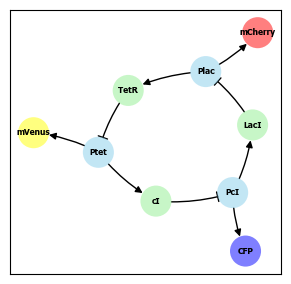

In [8]:
plt.figure(figsize=(3.5,3.5), dpi=100)
genetic_n.draw()

In [9]:
sample = lc.Sample(strain=strain)
assay = lc.Assay([sample], 
                n_measurements=100, 
                interval=0.24,
                name='Extended repressilator',
                description='Simulated expression of extended repressilator strain'
                )

In [10]:
assay.run(substeps=50, stochastic=False, mode='track_all')

100%|██████████| 100.0/100 [01:15<00:00,  1.32it/s]


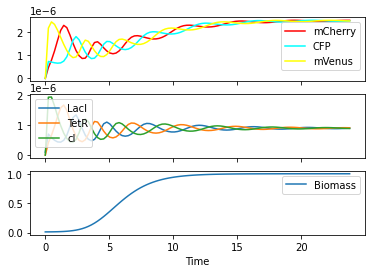

In [11]:
m = assay.measurements
fig,(ax, ax1, ax2) = plt.subplots(3,1, sharex=True)
m[m.Signal=='mCherry in Strain'].plot(x='Time', y='Measurement', color='red', style='-', ax=ax)
m[m.Signal=='CFP in Strain'].plot(x='Time', y='Measurement', color='cyan', style='-', ax=ax)
m[m.Signal=='mVenus in Strain'].plot(x='Time', y='Measurement', color='yellow', style='-', ax=ax)
m[m.Signal=='LacI in Strain'].plot(x='Time', y='Measurement', style='-', ax=ax1)
m[m.Signal=='TetR in Strain'].plot(x='Time', y='Measurement', style='-', ax=ax1)
m[m.Signal=='cI in Strain'].plot(x='Time', y='Measurement', style='-', ax=ax1)
m[m.Signal=='Strain biomass'].plot(x='Time', y='Measurement', style='-', ax=ax2)
ax.legend(['mCherry', 'CFP', 'mVenus'])
ax1.legend(['LacI', 'TetR', 'cI'])
ax2.legend(['Biomass'])

In [12]:
assay.run(substeps=50, stochastic=False, mode='single_cell')

100%|██████████| 100.0/100 [00:16<00:00,  5.98it/s]


<AxesSubplot:xlabel='Time'>

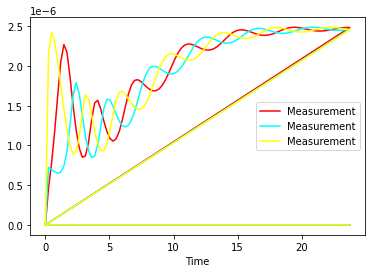

In [16]:
m = assay.measurements
fig1, ax = plt.subplots(1, 1)
m[m.Signal=='mCherry in Strain'].plot(x='Time', y='Measurement', color='red', style='-', ax=ax)
m[m.Signal=='CFP in Strain'].plot(x='Time', y='Measurement', color='cyan', style='-', ax=ax)
m[m.Signal=='mVenus in Strain'].plot(x='Time', y='Measurement', color='yellow', style='-', ax=ax)

In [14]:
assay.run(substeps=50, stochastic=False)

100%|██████████| 100.0/100 [00:20<00:00,  4.88it/s]


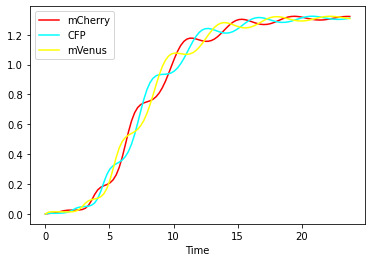

In [15]:
m = assay.measurements
fig, ax = plt.subplots(1, 1)
# fig,(ax, ax1) = plt.subplots(2,1, sharex=True)
m[m.Signal=='mCherry'].plot(x='Time', y='Measurement', color='red', style='-', ax=ax)
m[m.Signal=='CFP'].plot(x='Time', y='Measurement', color='cyan', style='-', ax=ax)
m[m.Signal=='mVenus'].plot(x='Time', y='Measurement', color='yellow', style='-', ax=ax)
# m[m.Signal=='Biomass'].plot(x='Time', y='Measurement', style='-', ax=ax2)
ax.legend(['mCherry', 'CFP', 'mVenus'])
# ax1.legend(['Biomass'])

# All degradation is equal

In [18]:
def growth_rate(t):
    return lc.gompertz_growth_rate(t, 0.01, 1, 1, 1)

def biomass(t):
    return lc.gompertz(t, 0.01, 1, 1, 1)

metab = lc.SimulatedMetabolism("Simulated metabolism", biomass, growth_rate)
genetic_n = lc.GeneticNetwork()

In [19]:
strain = lc.Strain('Strain', genetic_n, metab)

In [20]:
# Transcription factors
laci = lc.Regulator(name='LacI', degradation_rate=1.02, init_concentration=10**-7)
tetr = lc.Regulator(name='TetR', degradation_rate=1.02)
ci = lc.Regulator(name='cI', degradation_rate=1.02)

genetic_n.add_regulator([tetr, laci, ci])

In [21]:
mcherry = lc.Reporter(name='mCherry', degradation_rate=1.02, color='red') 
cyan = lc.Reporter(name='CFP', degradation_rate=1.02, color='blue') 
mven = lc.Reporter(name='mVenus', degradation_rate=1.02, color='yellow') 

genetic_n.add_reporter([mcherry, cyan, mven])

In [22]:
laci_not_tetr = lc.Hill1(name='Plac', input=laci, output=[tetr, mcherry], alpha=[1.44*10**-4, 1.44*10**-7], K=6.64*10**-8, n=2)
tetr_not_ci = lc.Hill1(name='Ptet', input=tetr, output=[ci, mven], alpha=[1.44*10**-4, 1.44*10**-7], K=6.64*10**-8, n=2)
ci_not_laci = lc.Hill1(name='PcI', input=ci, output=[laci, cyan], alpha=[1.44*10**-4, 1.44*10**-7], K=6.64*10**-8, n=2)


genetic_n.add_operator([laci_not_tetr, tetr_not_ci, ci_not_laci])

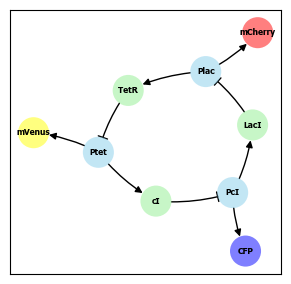

In [23]:
plt.figure(figsize=(3.5,3.5), dpi=100)
genetic_n.draw()

In [24]:
sample = lc.Sample(strain=strain)
assay = lc.Assay([sample], 
                n_measurements=100, 
                interval=0.24,
                name='Repressilator',
                description='Simulated expression of repressilator strain'
                )

In [25]:
assay.run(substeps=50, stochastic=False, mode='track_all')

100%|██████████| 100.0/100 [01:00<00:00,  1.65it/s]


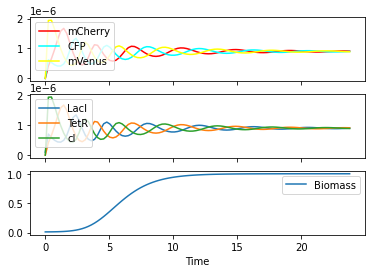

In [26]:
m = assay.measurements
fig,(ax, ax1, ax2) = plt.subplots(3,1, sharex=True)
m[m.Signal=='mCherry in Strain'].plot(x='Time', y='Measurement', color='red', style='-', ax=ax)
m[m.Signal=='CFP in Strain'].plot(x='Time', y='Measurement', color='cyan', style='-', ax=ax)
m[m.Signal=='mVenus in Strain'].plot(x='Time', y='Measurement', color='yellow', style='-', ax=ax)
m[m.Signal=='LacI in Strain'].plot(x='Time', y='Measurement', style='-', ax=ax1)
m[m.Signal=='TetR in Strain'].plot(x='Time', y='Measurement', style='-', ax=ax1)
m[m.Signal=='cI in Strain'].plot(x='Time', y='Measurement', style='-', ax=ax1)
m[m.Signal=='Strain biomass'].plot(x='Time', y='Measurement', style='-', ax=ax2)
ax.legend(['mCherry', 'CFP', 'mVenus'])
ax1.legend(['LacI', 'TetR', 'cI'])
ax2.legend(['Biomass'])

In [27]:
assay.run(substeps=50, stochastic=False, mode='single_cell')

100%|██████████| 100.0/100 [00:15<00:00,  6.36it/s]


<AxesSubplot:xlabel='Time'>

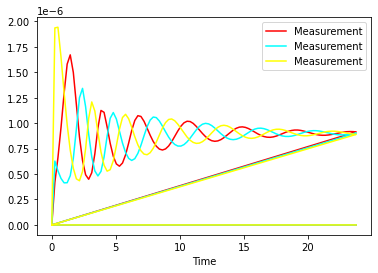

In [28]:
m = assay.measurements
fig, ax = plt.subplots(1, 1)
m[m.Signal=='mCherry in Strain'].plot(x='Time', y='Measurement', color='red', style='-', ax=ax)
m[m.Signal=='CFP in Strain'].plot(x='Time', y='Measurement', color='cyan', style='-', ax=ax)
m[m.Signal=='mVenus in Strain'].plot(x='Time', y='Measurement', color='yellow', style='-', ax=ax)

In [29]:
assay.run(substeps=50, stochastic=False)

100%|██████████| 100.0/100 [00:14<00:00,  6.84it/s]


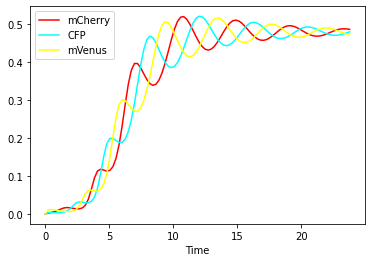

In [30]:
m = assay.measurements
fig, ax = plt.subplots(1, 1)
# fig,(ax, ax1) = plt.subplots(2,1, sharex=True)
m[m.Signal=='mCherry'].plot(x='Time', y='Measurement', color='red', style='-', ax=ax)
m[m.Signal=='CFP'].plot(x='Time', y='Measurement', color='cyan', style='-', ax=ax)
m[m.Signal=='mVenus'].plot(x='Time', y='Measurement', color='yellow', style='-', ax=ax)
# m[m.Signal=='Biomass'].plot(x='Time', y='Measurement', style='-', ax=ax2)
ax.legend(['mCherry', 'CFP', 'mVenus'])
# ax1.legend(['Biomass'])